In [3]:
from MeerkatPipeline import (
    HeartRatePipeline,
    PulseOxygenationPipeline,
    FlowVolumeLoopPipeline,
    RespiratoryPipeline,
    BreathingAsymmetryPipeline,
)
from MeerkatPipelineHelperfunctions import vital_sign_summary_statistics
from ventiliser.GeneralPipeline import GeneralPipeline



# Needs to be edited by user:
# Define folder of the dataset
database_path = r"C:\Users\silas\Master Project\Meerkat Vital Sign Monitoring\dataset"

# Heart rate analysis

1 : mk001
2 : mk004
3 : mk005
4 : mk019
5 : mk021
6 : mk023
7 : mk025
8 : mk026
9 : mk045
10 : mk047
11 : mk501
12 : mk502
13 : mk503
14 : mk504


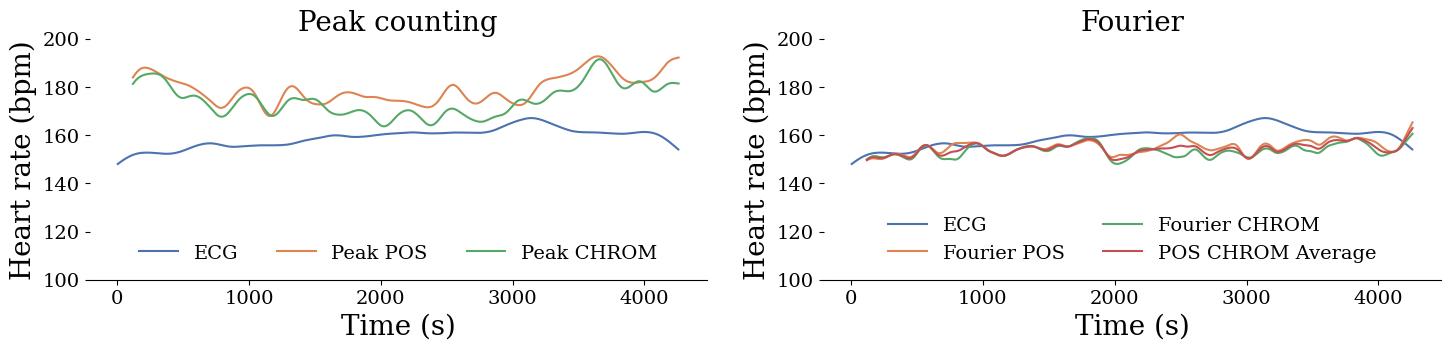

POS_Peak_counting analysis
Data points: 2069
Mean Absolute Difference (MAD): 19.8485
MAD as Percentage of Ground Truth Mean: 12.46%
MSE: 446.3766
CP 10%: 0.3639439342677622
CP 20%: 0.9207346544224263
CHROM_Peak_counting analysis
Data points: 2069
Mean Absolute Difference (MAD): 15.1205
MAD as Percentage of Ground Truth Mean: 9.50%
MSE: 294.4811
CP 10%: 0.5389076848719188
CP 20%: 0.9594006766553891
POS_Fourier_analysis analysis
Data points: 2069
Mean Absolute Difference (MAD): 4.5387
MAD as Percentage of Ground Truth Mean: 2.85%
MSE: 32.2476
CP 10%: 1.0
CP 20%: 1.0
CHROM_Fourier_analysis analysis
Data points: 2069
Mean Absolute Difference (MAD): 5.9149
MAD as Percentage of Ground Truth Mean: 3.71%
MSE: 50.6916
CP 10%: 1.0
CP 20%: 1.0
CHROM_POS analysis
Data points: 2069
Mean Absolute Difference (MAD): 5.1947
MAD as Percentage of Ground Truth Mean: 3.26%
MSE: 39.7330
CP 10%: 1.0
CP 20%: 1.0


In [16]:
hr = HeartRatePipeline(database_path, 3600)
hr.run()
#7 for example

# Pulse oxygenation

In [3]:
ox = PulseOxygenationPipeline(database_path, 900)
ox.run()
# 5 for example

1 : mk001
2 : mk004
3 : mk005
4 : mk019
5 : mk021
6 : mk023
7 : mk025
8 : mk026
9 : mk045
10 : mk047
11 : mk501
12 : mk502
13 : mk503
14 : mk504
No valid pulse oximeter data


NameError: name 'sys' is not defined

# Respiratory rate and tidal volume

1 : mk001
2 : mk004
3 : mk005
4 : mk019
5 : mk021
6 : mk023
7 : mk025
8 : mk026
9 : mk045
10 : mk047
11 : mk501
12 : mk502
13 : mk503
14 : mk504


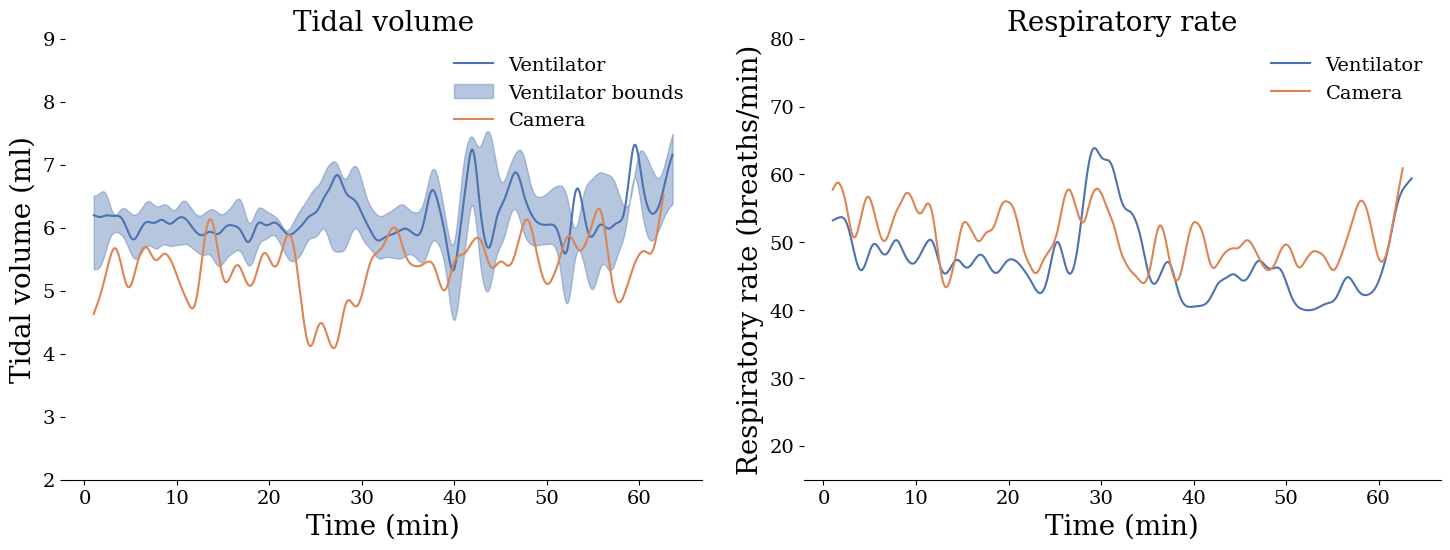

Resp Fourier
Data points: 3357
Mean Absolute Difference (MAD): 5.2604
MAD as Percentage of Ground Truth Mean: 11.14%
MSE: 37.8597
CP 10%: 0.46053023532916293
CP 20%: 0.9091450700029788
Resp Peak Counting
Data points: 3357
Mean Absolute Difference (MAD): 14.7952
MAD as Percentage of Ground Truth Mean: 31.33%
MSE: 296.4166
CP 10%: 0.07476913911230265
CP 20%: 0.27018170985999407
Tidal Volume
Data points: 3357
Mean Absolute Difference (MAD): 0.7984
MAD as Percentage of Ground Truth Mean: 12.96%
MSE: 0.9716
CP 10%: 0.45516830503425676
CP 20%: 0.7956508787607983
Tidal Volume Upper Lower
Data points: 3357
Data points: 3357
Mean Absolute Difference (MAD): 0.4785
MAD as Percentage of Ground Truth Mean: 8.31%
MSE: 0.3888
CP 10%: 0.7056896038129282
CP 20%: 0.9070598748882931


In [2]:
Resp = RespiratoryPipeline(database_path, 1800 , 1800)
Resp.run()

# Flow-volume loops

1 : mk001
2 : mk004
3 : mk005
4 : mk019
5 : mk021
6 : mk023
7 : mk025
8 : mk026
9 : mk045
10 : mk047
11 : mk501
12 : mk502
13 : mk503
14 : mk504
No ventilator data


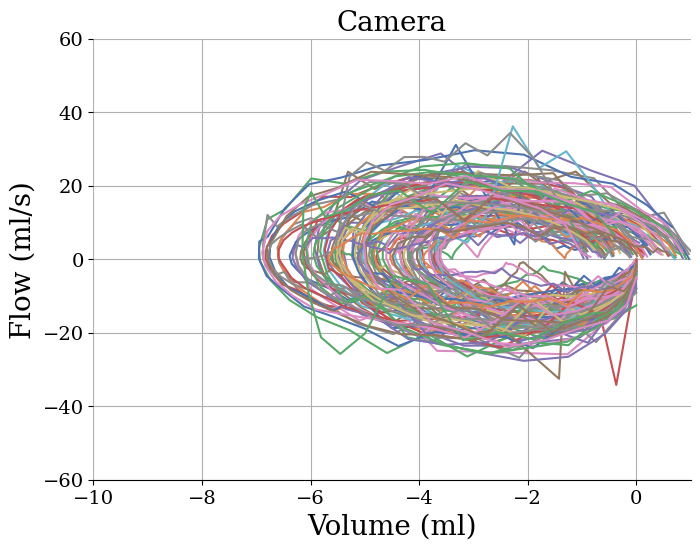

In [3]:
if __name__ == "__main__":#Required for ventiliser package
    fv = FlowVolumeLoopPipeline(data_analysis_folder=database_path, plot_single_loops_flag=False)
    intermediate_file, has_ventilator = fv.run_part1()

    # use ventiliser to calculate beginning and end of breaths using bandpass filtered data
    if has_ventilator:
        pipeline = GeneralPipeline()
        pipeline.configure()  # For information on parameters you can configure see docs
        pipeline.load_data(
            intermediate_file, [0, 1, 2]
        )  # [0,1,2] refers to the columns in your data file corresponding to time, pressure, flow

        pipeline.process()  # You can suppress log and output files by setting them false. See docs for more information

    fv.run_part2()  # intermediate_file, intermediate_folder, subject_file)
    
#5 is example
#3 as well
#13 for publication plot

# Asymmetry

1 : mk001
2 : mk004
3 : mk005
4 : mk019
5 : mk021
6 : mk023
7 : mk025
8 : mk026
9 : mk045
10 : mk047
11 : mk501
12 : mk502
13 : mk503
14 : mk504


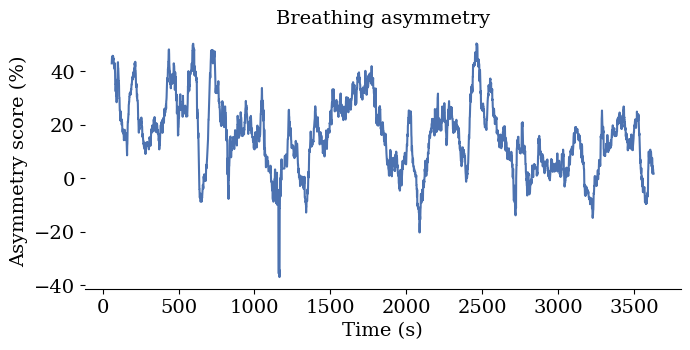

In [4]:
asym = BreathingAsymmetryPipeline(database_path)
asym.run()
#mk047 has positive asymmetry
#mk026 is very balanced
#mk502 has large negative

# Summary statistics

Tidal_volume_upper_lower
Number of subjects:  3
CP 10%: 0.5199619771863118
CP 20%: 0.754657794676806
Mean Absolute Difference (MAD): 0.6131
MAD as Percentage of Ground Truth Mean: 12.91%
MSE: 0.6413


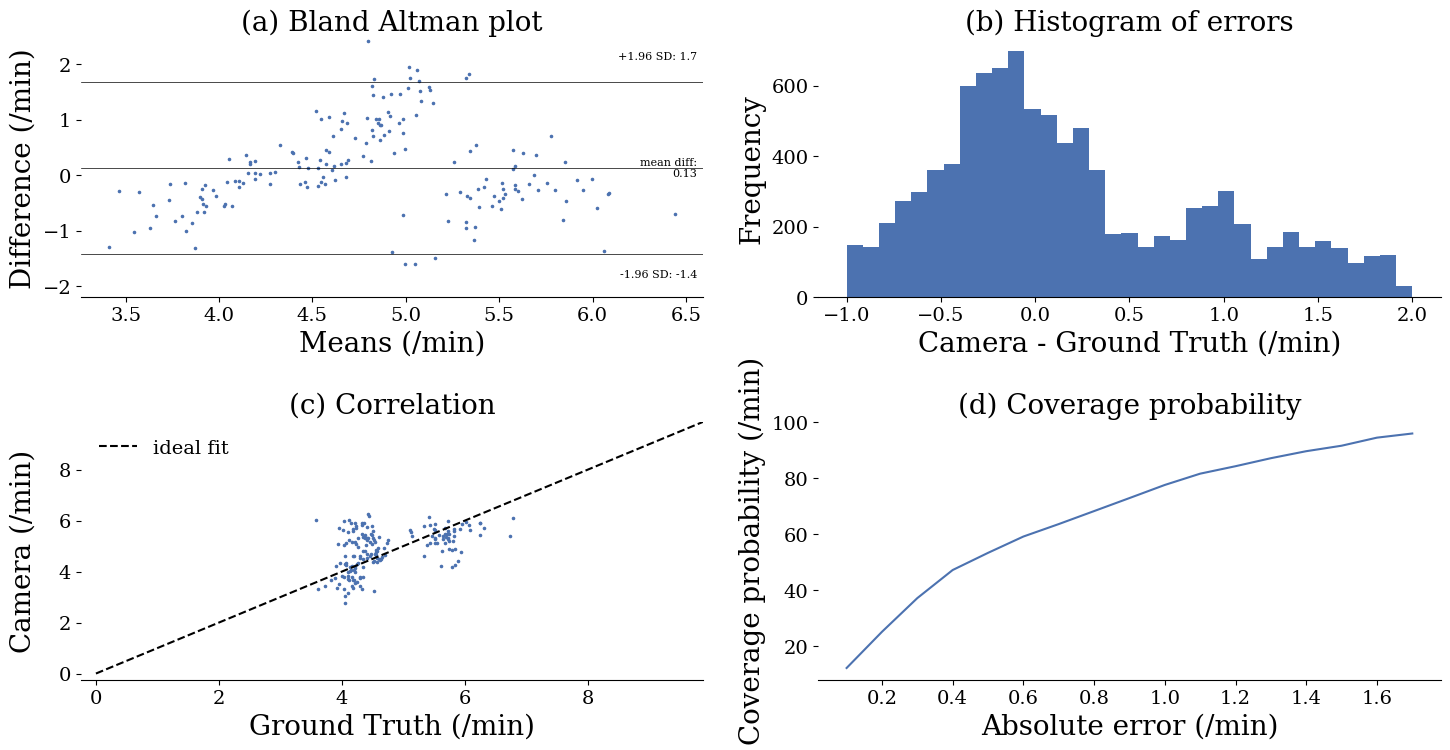

In [22]:
methods={
    "1": "POS_Fourier_analysis",
    "2": "CHROM_Fourier_analysis",
    "3": "CHROM_POS", #Average of "1" and "2"
    "4": "CHROM_Peak_counting",
    "5": "POS_Peak_counting",
    "6": "infrared_oxygen_saturation",
    "7": "ycgcr_oxygen_saturation",
    "8": "rgb_oxygen_saturation",
    "9": "calibration_free_oxygen_saturation",
    "10": "Resp_Fourier",
    "11": "Resp_Peak_counting",
    "12": "Tidal_volume",
    "13": "Tidal_volume_upper_lower" #includes ventilator uncertainty   
}

method_key="13"
vital_sign_summary_statistics(database_path, methods[method_key])